In [20]:
# p.25 2.2.1 オブジェクト指向のパーセプトロンAPI
import numpy as np

class Perceptron(object):
    """ パーセプトロンの分類器
    
    パラメータ
    ------------------
    eta: float
        学習率 (0.0より大きく1.0以下の値)
    n_iter: int
        トレーニングデータのトレーニング回数
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ------------------
    w_ : 1次元配列
        適合後の重み
    errors_ : list
        各エポックで誤分類(更新)の数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        ------------------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_sapmlesはサンプルの個数、n_featuresは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        ------------------
        self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter): # トレーニング回数分トレーニングデータを反映
            errors = 0
            for xi, target in zip(X, y): # 各サンプルで重みを更新
                # 重み w1, ... , wm の更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                
                # 重み w0の更新
                self.w_[0] += update
                
                # 重みの更新が0出ない場合はご分類としてカウント
                errors += int(update != 0.0)
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [21]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [22]:
import numpy as np
a = np.arange(3)
b = np.arange(3, 6)
print(a)
print(b)
print(a*b)

[0 1 2]
[3 4 5]
[ 0  4 10]


In [23]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


[]

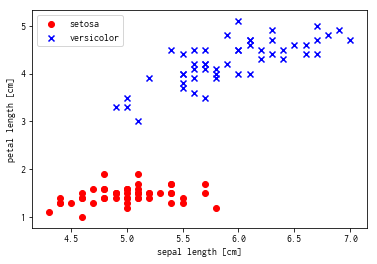

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values

# Iris-setosaを-1, Iris-virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)

# 1-100行目の1, 3列の抽出
X = df.iloc[0:100, [0, 2]].values

# setosaのプロット(赤の○)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

# versicolorのプロット(青の✕)
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

# 凡例の設定(左上に配置)
plt.legend(loc='upper left')

# 図の表示
plt.plot()

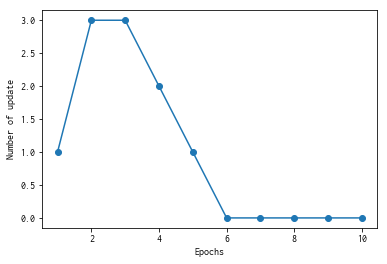

In [25]:
# パーセプトロンのオブジェクト生成(インスタンス化)
ppn = Perceptron(eta=0.1, n_iter=10)

# トレーニングデータモデルの適合
ppn.fit(X, y)

# エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')

# 図の表示
plt.show()

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   label=cl,
                   edgecolor='black')

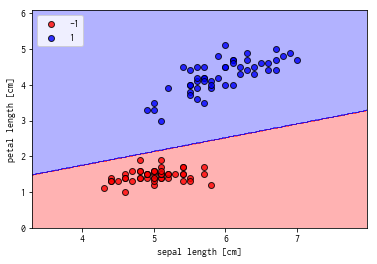

In [30]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)

# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

# 凡例の設定(左上に配置)
plt.legend(loc='upper left')

# 図の表示
plt.show()

In [37]:
# p.37 2.5.1 ADALINEをPythonで実装する
class AdalineGD(object):
    """ ADAptive LInear NEuron分類器 
    
    パラメータ
    ----------
    eta: float
        学習率 (0.0より大きく1.0以下の値)
    n_iter: int
        トレーニングデータのトレーニング回数
    shuffle: bool(デフォルト: True)
        Trueの場合は、循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ----------
    w_ : 1次元配列
        適合後の重み
    cost_ : list
        各エポックでの誤差平方和のコスト関数
    """
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる 
        
        パラメータ
        ----------
        X : {入れうtのようなデータ構造}, shape = {n_samples, n_features}
            トレーニングデータ
            n_sampleはサンプルの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter): # トレーニング回数分トレーニングデータを反復
            net_input = self.net_input(X)
            
            output = self.activation(net_input)
            
            # 誤差の計算
            errors = (y - output)
            
            # w1, ... wmの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            
            # w0の更新
            self.w_[0] += self.eta * errors.sum()
            
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            
            # コストの格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 線形活性化関数の出力を計算 """
        return X
    
    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

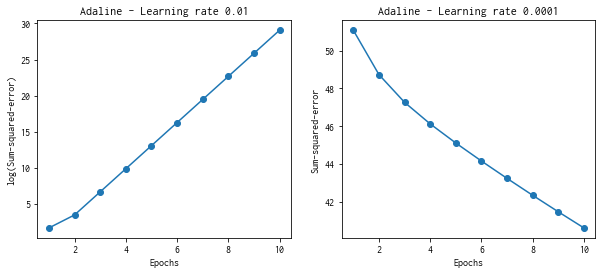

In [39]:
# 描画領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

# エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')

# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')

# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')

# 勾配降下法によるADALINEの学習(学習率 eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

# エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')

# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')

# 図の表示
plt.show()

In [40]:
# データのコピー
X_std = np.copy(X)

# 各列の標準化
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

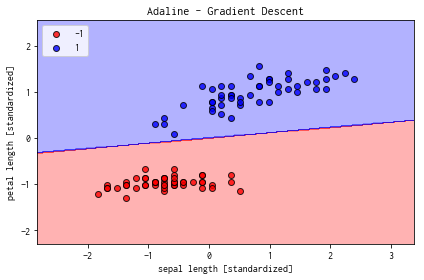

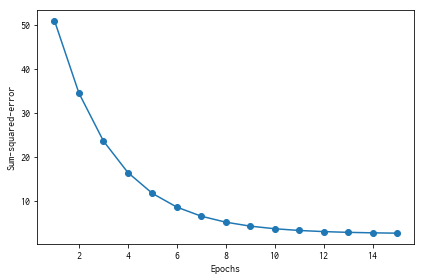

In [41]:
# 勾配降下法によるADALINEの学習(標準化後、学習率 eta=0.01)
ada = AdalineGD(n_iter=15, eta=0.01)

# モデルの適合
ada.fit(X_std, y)

# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)

# タイトルの設定
plt.title('Adaline - Gradient Descent')

# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

# 凡例の表示(左上に配置)
plt.legend(loc='upper left')

# 図の表示
plt.tight_layout()
plt.show()

# エポック数とコストの関数を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

# 図の表示
plt.tight_layout()
plt.show()